In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-air-quality-2023-6-cities/Cairo_Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/London_Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/New_York_Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/Dubai_Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/Sydney_Air_Quality.csv
/kaggle/input/global-air-quality-2023-6-cities/Brasilia_Air_Quality.csv


In [2]:
df = pd.read_csv('/kaggle/input/global-air-quality-2023-6-cities/Air_Quality.csv')

In [3]:
df.shape

(52560, 9)

In [4]:
df.head(3)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998


In [5]:
bins = [0,51,101,201,301,401,np.inf]
labels = ['Good','Satisfactory','Moderate','Poor','Very Poor','Severe'] 
df['AQI_category'] = pd.cut(df['AQI'],bins= bins,labels=labels)

In [6]:
df.head(3)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI,AQI_category
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330,Good
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000,Good
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998,Good


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['CO_new_map'] = (df['CO']/df['CO'].min()).round()

In [9]:
df.dtypes

Date            datetime64[ns, UTC]
City                         object
CO                          float64
NO2                         float64
SO2                         float64
O3                          float64
PM2.5                       float64
PM10                        float64
AQI                         float64
AQI_category               category
CO_new_map                  float64
dtype: object

In [10]:
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI,AQI_category,CO_new_map
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330,Good,6.0
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000,Good,6.0
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998,Good,6.0
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999,Good,6.0
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999,Good,5.0


In [11]:
## Range of the Date 
df.Date.dt.date.min()  , df.Date.dt.date.max()

(datetime.date(2023, 1, 1), datetime.date(2023, 12, 31))

In [12]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI,CO_new_map
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352,5.695890
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747,3.584897
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000,1.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333,3.000000
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000,5.000000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332,7.000000
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980,45.000000


In [13]:
df_avg_pollu = df.groupby(['City','AQI_category'])['AQI'].mean().fillna(0).unstack().round()

/tmp/ipykernel_13/3666948636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg_pollu = df.groupby(['City','AQI_category'])['AQI'].mean().fillna(0).unstack().round()


In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: xlabel='AQI_category', ylabel='City'>

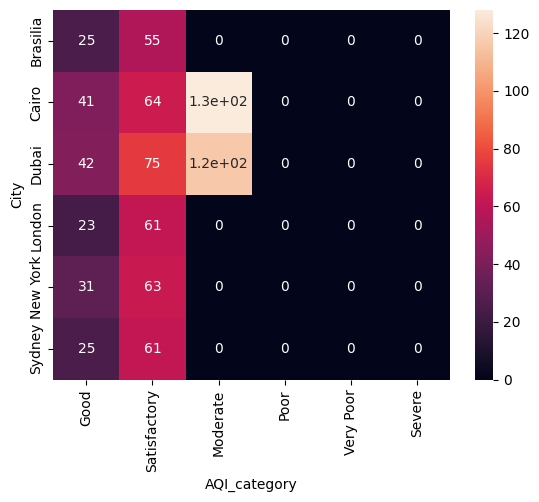

In [15]:
sns.heatmap(df_avg_pollu,annot=True)

In [16]:
df_avg_pollu.style.background_gradient()

AQI_category,Good,Satisfactory,Moderate,Poor,Very Poor,Severe
City,,,,,,
Brasilia,25.000000,55.000000,0.000000,0.000000,0.000000,0.000000
Cairo,41.000000,64.000000,128.000000,0.000000,0.000000,0.000000
Dubai,42.000000,75.000000,116.000000,0.000000,0.000000,0.000000
London,23.000000,61.000000,0.000000,0.000000,0.000000,0.000000
New York,31.000000,63.000000,0.000000,0.000000,0.000000,0.000000
Sydney,25.000000,61.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
df.head(3)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI,AQI_category,CO_new_map
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330,Good,6.0
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000,Good,6.0
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998,Good,6.0


In [18]:
df.set_index('Date',inplace = True)

In [19]:
df.head()

,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI,AQI_category,CO_new_map
Date,,,,,,,,,,
2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330,Good,6.0
2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000,Good,6.0
2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998,Good,6.0
2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999,Good,6.0
2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999,Good,5.0


In [20]:
num_df = df.select_dtypes(np.number)
num_df = num_df[['NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI', 'CO_new_map']]

num_df.columns.to_list()

['NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI', 'CO_new_map']

In [21]:
cmap = sns.color_palette("husl", len(num_df.columns)).as_hex()
cmap

['#f77189', '#c69432', '#82a931', '#34af8a', '#37aabb', '#8197f4', '#f45deb']

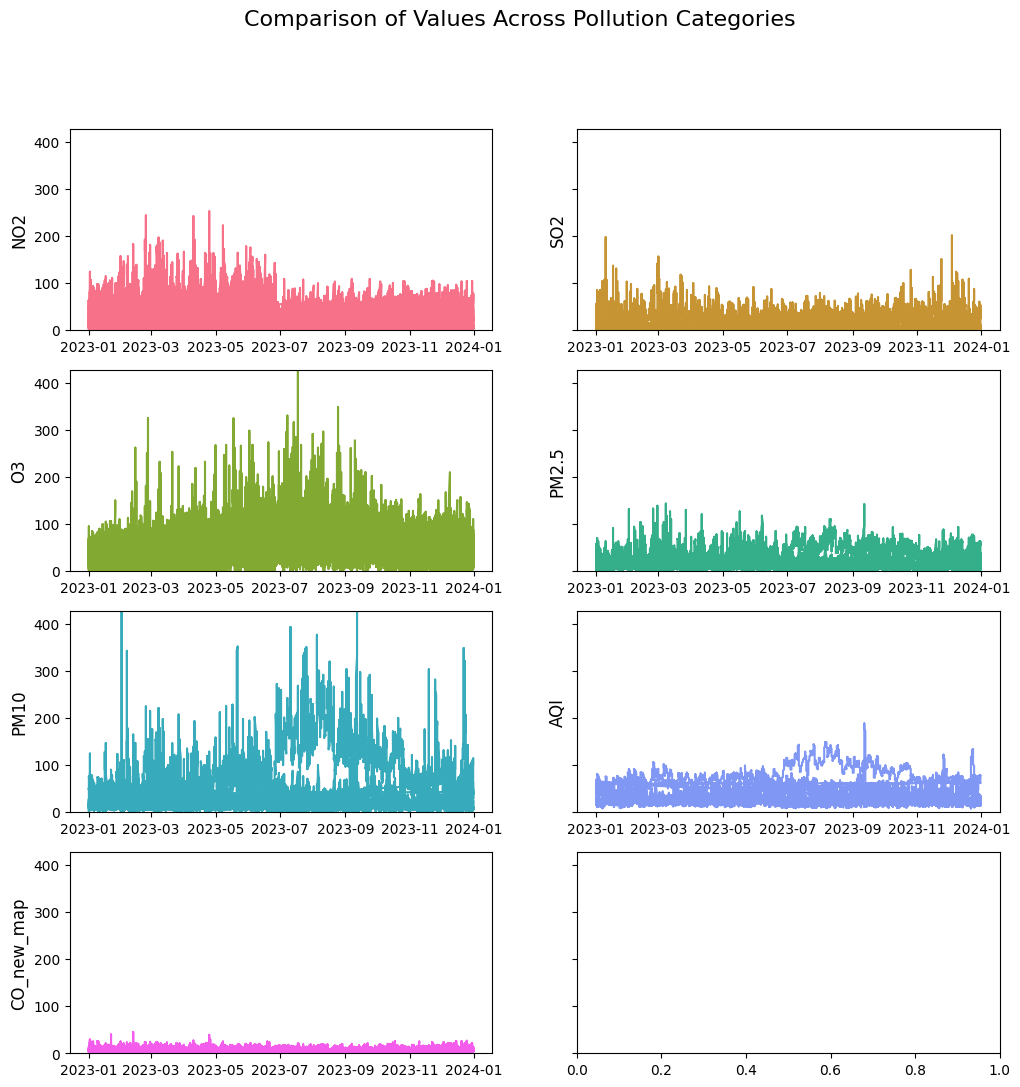

In [22]:
fig , axs = plt.subplots(nrows=4,ncols=2,figsize=(12,12),sharey=True)
axs = axs.flatten()
fig.suptitle('Comparison of Values Across Pollution Categories', fontsize=16)
for i,col in enumerate(num_df.columns):
     axs[i].plot(num_df.index.date ,df[col] , color = cmap[i])
     axs[i].set_ylabel(f'{col}',fontsize=12)
     axs[i].set_ylim(0, 426)
      
     

plt.show()

<Axes: xlabel='Date'>

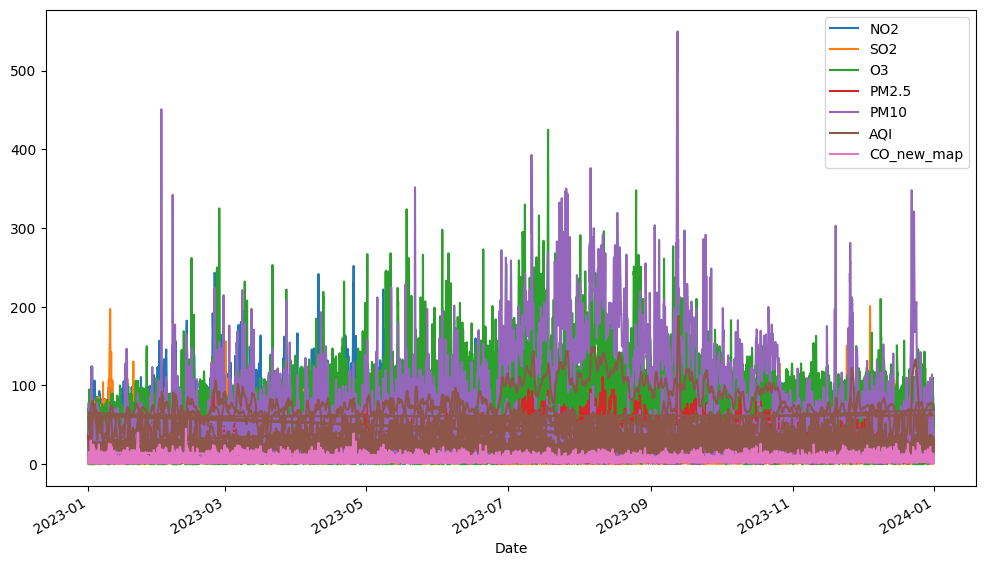

In [23]:
num_df.plot(figsize=(12,7))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

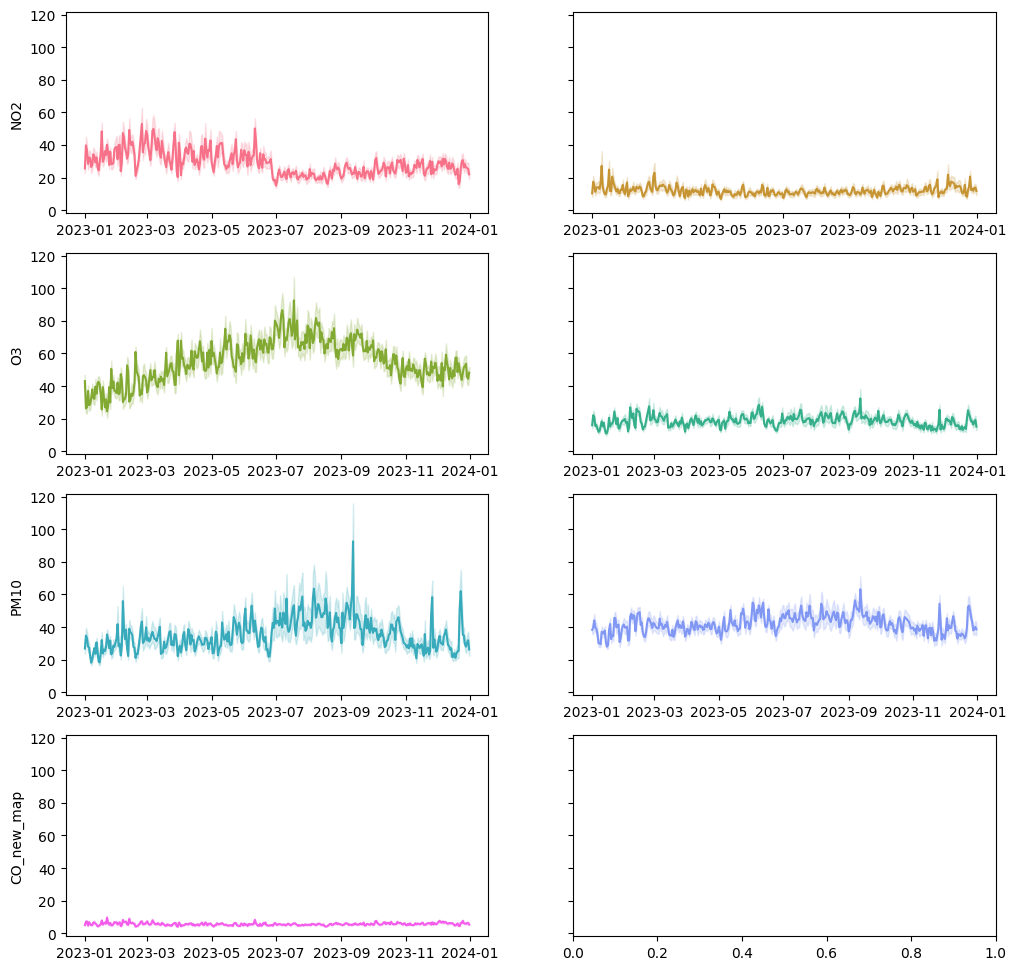

In [24]:
fig , axs = plt.subplots(nrows=4,ncols=2,figsize=(12,12),sharey=True)
axs = axs.flatten()
for i,col in enumerate(num_df.columns):
    sns.lineplot(data = num_df,x = num_df.index.date , y = col ,color = cmap[i],ax=axs[i])

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


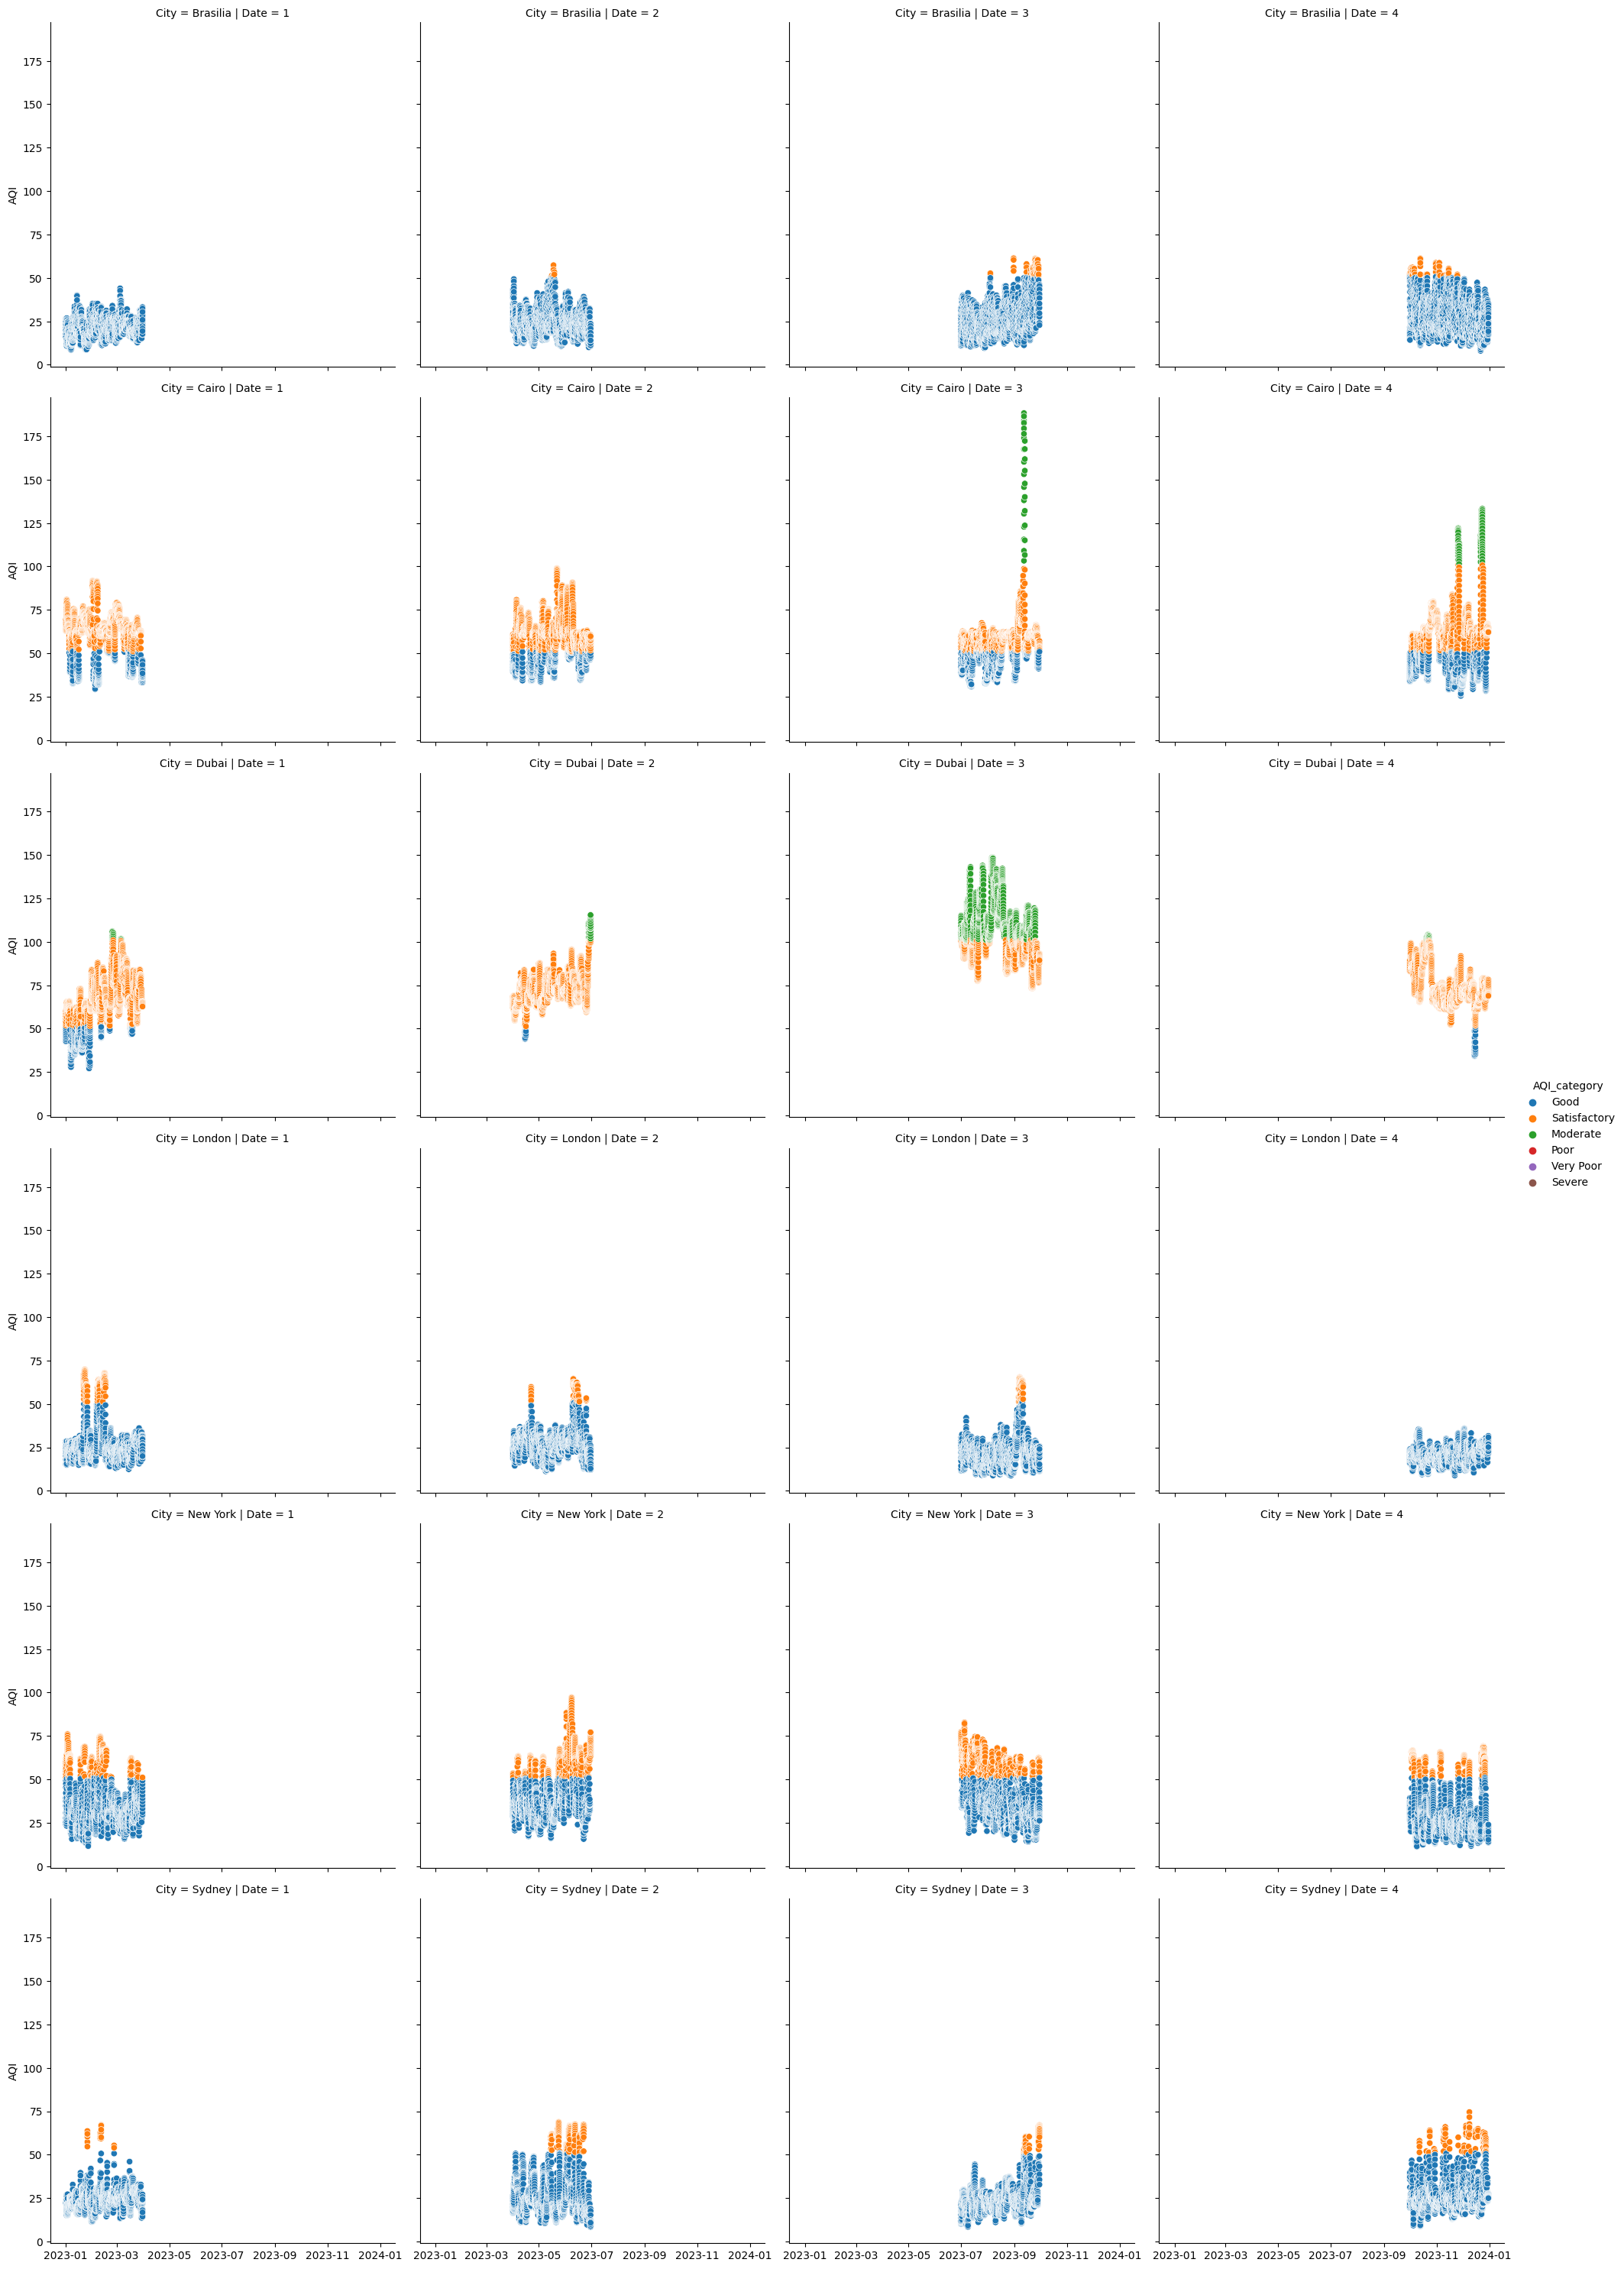

In [25]:

sns.relplot(data = df , x = df.index.date , y='AQI',hue = 'AQI_category',col =df.index.quarter , row='City')


In [26]:
df['AQI_category'].value_counts()

AQI_category
Good            35361
Satisfactory    15602
Moderate         1597
Poor                0
Very Poor           0
Severe              0
Name: count, dtype: int64